In [1]:
# !pip install seaborn
# !pip install plotly
# !pip install sklearn
!pip install livelossplot

In [2]:
import pandas as pd # Manipulação
import numpy as np # Cálculos
import matplotlib.pyplot as plt # Visualização
import seaborn as sns #Visualização
import plotly.express as px #Visualização

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, accuracy_score

from livelossplot import PlotLosses

ValueError: source code string cannot contain null bytes

In [3]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

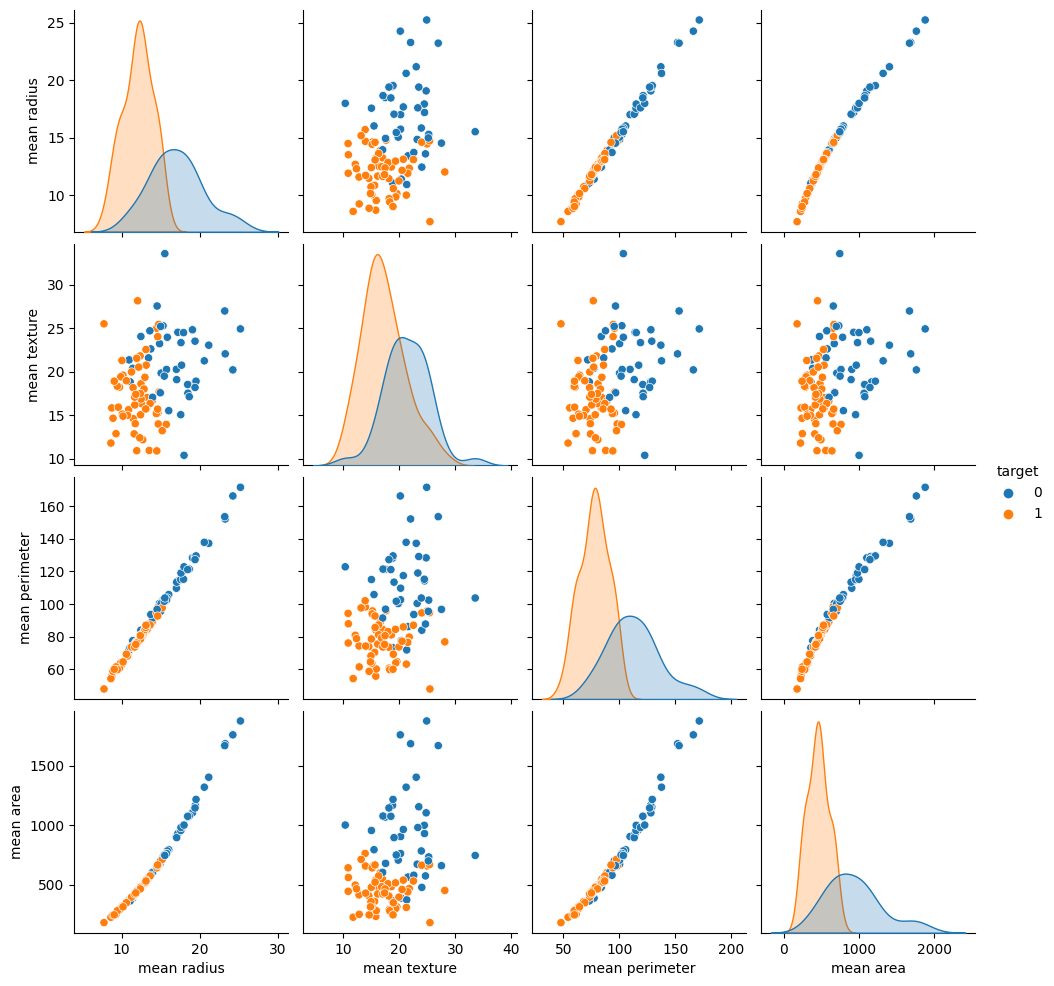

In [6]:
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']].sample(100), hue='target')

* Raio médio é bem relevante
* Perímetro, raio e área possuem colinearidade

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

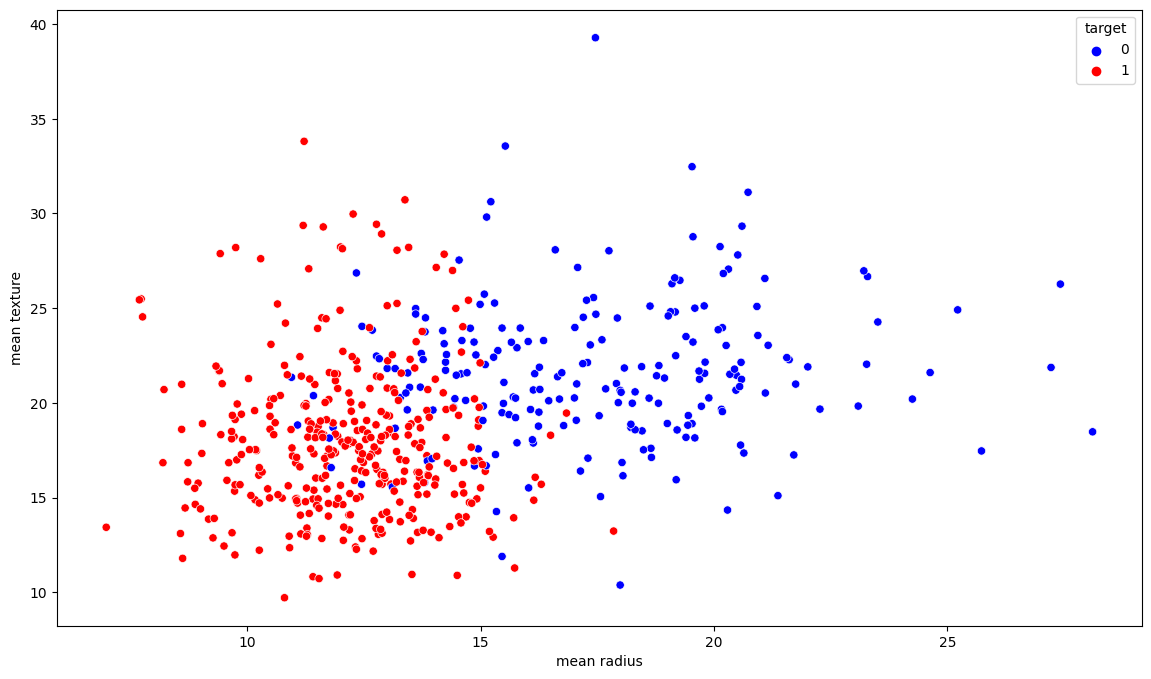

In [7]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = 'mean radius', y = 'mean texture', hue='target', palette={0: 'blue', 1:'red'}, data=df)

## Regressão Logística

### Iremos ajustar a equação da reta aos dados

### $$y = \frac{1}{1+e^{-z}} $$
### $$z = \theta_{0} + \theta_{1}x_{i} $$

### RL univariada

### $$f(x_{i}) = \theta_{0} + \theta_{1}x_{i} $$

### RL multivariada

### $$f(x_{i}) = \theta_{0}  + \theta_{1}x_{i1} + \theta_{2}x_{i2} + ... + \theta_{1m}x_{im} $$

### No nosso exemplo temos:

### Dataset:
#### $X = (x_{r0}, x_{t0}), (x_{r1}, x_{t1}), ..., (x_{rn}, x_{tn})$
#### $Y = y_{0}, y_{1}, ..., y_{n}$

#### Amostra:
#### $x_{fi} = $ i-ésimo indivíduo na base de dados

#### Variável:
#### $x_{f1} = $ variável $f$ (feature) do i-ésimo indivíduo

#### Label (rótulo):
#### $y_{i} = $ diagnóstico do tumor do i-ésimo indivíduo

#### Valor predito:
#### $f(x_{i}) = $ diagnóstico calculado para o i-ésimo indivíduo

### Processo de treino:

A partir de parâmetros inciais aleatórios ($\theta_{0}$, $\theta_{1}$ e $\theta_{2}$) passar pela experiência de tentar prever o idagnóstico ($y$), ser avaliado por uma função de custo e ser ajustado para minimizar o erro

### Função de custo (loss)
#### MSE - Erro Quadrático Médio
### $$L = \frac{1}{n} \sum_{i=0}^{n}(f(x_{i}) - y_{i})^2 $$

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def RL(x_ri, x_ti):
    return sigmoid(25 - 1*x_ri - 1*x_ti)

x = df[['mean radius', 'mean texture']].head(100).values
y = df[['target']].head(100).values
f_x = np.zeros(100)
mse = np.zeros(100)

for i in range(100):
    f_x[i] = RL(x[i,0], x[i,1])
    mse[i] = (f_x[i] - y[i])**2

In [9]:
f_x

array([3.32463088e-02, 1.60883280e-06, 1.19493947e-07, 1.11253603e-03,
       6.57227301e-05, 4.10912782e-02, 1.79590444e-06, 7.19116760e-05,
       5.43506300e-05, 1.01299910e-05, 6.41151126e-07, 1.71629642e-04,
       5.77342696e-09, 3.73629798e-07, 1.18876336e-05, 3.82164404e-08,
       5.48968330e-05, 7.42983111e-06, 4.30889160e-08, 5.21535631e-02,
       2.20963222e-02, 9.55040858e-01, 9.95180187e-03, 4.58718173e-09,
       2.19352177e-06, 1.95452051e-04, 1.49617298e-05, 9.56484784e-07,
       1.72995514e-07, 4.90301318e-04, 7.26643522e-09, 3.91116953e-03,
       1.12535162e-07, 9.83405074e-10, 1.22166929e-04, 1.62500182e-06,
       1.72100471e-05, 1.57802806e-03, 2.52968654e-07, 9.14158739e-05,
       4.44989707e-05, 6.75082731e-04, 6.31713530e-09, 1.91582583e-04,
       4.63149240e-05, 1.30071285e-05, 4.91000972e-01, 1.07969112e-03,
       1.57095469e-01, 2.06040973e-05, 2.33989570e-04, 6.82713242e-03,
       5.59650922e-03, 6.65590148e-06, 5.44939781e-06, 5.11728923e-03,
      

In [10]:
np.round(f_x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
y.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [12]:
accuracy_score(y.reshape(-1), np.round(f_x))

0.71

In [13]:
mean_squared_error(y.reshape(-1), np.round(f_x))

0.29

C:\Users\thiag\AppData\Local\Temp\ipykernel_12896\606846200.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


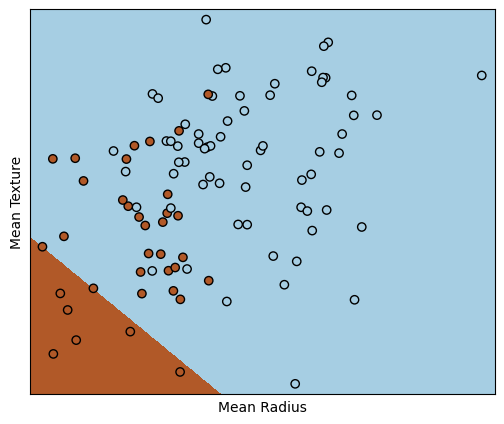

In [14]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = RL(xx.ravel(), yy.ravel())
Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Função a ser otimizada
### $$min \frac{1}{n} \sum_{i=0}^{n}((\theta_{0} + \theta x) - y_{i})^2 $$


### Como alterar os parâmetros para minimizar o erro?

### Função de ajuste dos pesos com GD e MSE

### $$\theta_{0} = \theta_{0} - \alpha\frac{2}{n} \sum_{i=0}^{n}(f(x_{i}) - y_{i}) $$
### $$\theta = \theta - \alpha\frac{2}{n} \sum_{i=0}^{n}(f(x_{i}) - y_{i})x_{i} $$

In [15]:
def GD(f_x, x, y, theta_0, theta_1, theta_2, lr):   
    theta_0 = theta_0 - lr*(2/len(y))*(np.sum(f_x - y))
    theta_1 = theta_1 - lr*(2/len(y))*(np.sum((f_x - y)*x[:,0]))
    theta_2 = theta_2 - lr*(2/len(y))*(np.sum((f_x - y)*x[:,1]))
    return theta_0, theta_1, theta_2

def sigmoid(x):
    return 1 / ((1 + np.exp(-x)))

def RL(x, theta_0, theta_1, theta_2):
    return sigmoid(theta_0 + theta_1*x[:,0] + theta_2*x[:,1])

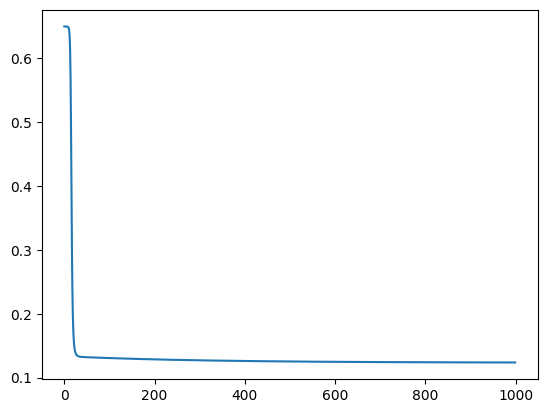

0.12374116443697165


In [21]:
groups = {'mse': ['train'], 'theta': ['0', '1', '2']}
# plotlosses = PlotLosses(groups=groups)

x = df[['mean radius', 'mean texture']].head(100).values
y = df[['target']].head(100).values
lr = 0.00001

#np.random.seed(321)
theta_0 = np.random.random()*10
theta_1 = np.random.random()
theta_2 = np.random.random()

losses = []

max_epochs = 1000
for epoch in range(max_epochs):
    f_x = RL(x, theta_0, theta_1, theta_2)
    #print(np.min(f_x))
    l = mean_squared_error(f_x, y)
    losses.append(l)
    theta_0, theta_1, theta_2 = GD(f_x, x, y, theta_0, theta_1, theta_2, lr)
    
    #plotlosses.update({'train': l, '0': theta_0, '1': theta_1, '2': theta_2})
    #plotlosses.send()
    
plt.plot(losses)
plt.show()
print(l)

In [22]:
np.round(f_x)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.])

In [23]:
y.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

C:\Users\thiag\AppData\Local\Temp\ipykernel_12896\95341166.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


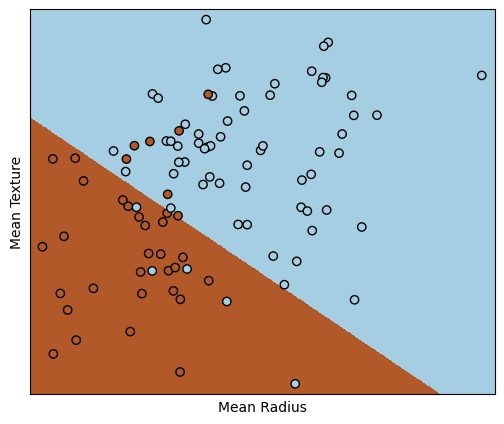

In [24]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = RL(np.c_[xx.ravel(), yy.ravel()], theta_0, theta_1, theta_2)
Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [25]:
accuracy_score(y.reshape(-1), np.round(f_x))

0.88

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(x,y))
print(scaler.mean_)
# print(scaler.transform(x))
print(scaler.fit_transform(x,y))
